In [25]:
import numpy as np
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
--pylab

NameError: name 'pylab' is not defined

In [32]:
data = pd.read_table('Fsatellites.tsv', encoding = "ISO-8859-1")
print(data.shape)

for col in data.columns:
    if 'Unnamed' in col:
        del data[col]
        
for col in data.columns:
    if 'Source' in col:
        del data[col]
data
#data = data.fillna(data.min())


(1381, 254)


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Power (watts),Date of Launch,Expected Lifetime,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,...,NaN,10/2/2015,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...
1,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,"16,000",2/6/2014,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond..."
2,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,...,"9,000",8/19/1997,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,3/2/2015,15 yrs.,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.
4,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,"7,400",3/13/2004,12 yrs.,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.
5,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,159.00,...,"6,800 (EOL)",9/26/1999,15 yrs.,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924,"28 C-band, 16 Ku-band; business services, publ..."
6,"ABS-7 (Koreasat 3, Mugungwha 3)",South Korea,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,116.18,...,"4,800",9/4/1999,15 yrs.,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894,"30 Ku-band, 6 Ka-band; Korean peninsula, the J..."
7,"Advanced Orion 2 (NROL 6, USA 139)",USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336,ELINT.
8,"Advanced Orion 3 (NROL 19, USA 171)",USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937,Electronic intelligence (ELINT).
9,"Advanced Orion 4 (NRO L-26, USA 202)",USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,44.00,...,NaN,1/18/2009,NaN,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2009-001A,33490,ELINT.


In [33]:
data.columns.values

array(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'], dtype=object)

In [34]:
data.columns=['name', 'country_reg', 'country', 'owner', 'users',
              'purpose', 'description', 'CLO', 'TOO', 'longitude',
              'perigee', 'apogee', 'eccentricity', 'inclination', 
              'period', 'launch_mass', 'dry_mass', 'power',
              'launch_date', 'expected_lifetime', 'contractor', 
              'contractor_country', 'launch_site', 'launch_vehicle',
              'COSPAR', 'NORAD', 'comments']
data.head()

,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,...,power,launch_date,expected_lifetime,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,...,NaN,10/2/2015,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...
1,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,"16,000",2/6/2014,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond..."
2,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,...,"9,000",8/19/1997,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,3/2/2015,15 yrs.,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.
4,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,"7,400",3/13/2004,12 yrs.,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.


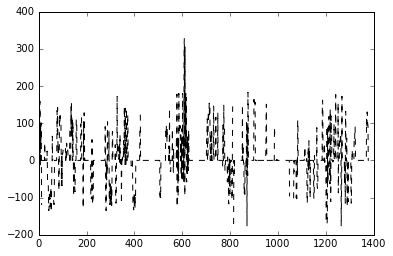

In [35]:
plt.plot(data['longitude'], 'k--')



In [36]:
data.to_csv('CSatellites.csv')